# *** ME460 Linkages - Prof. Mark Ganter
# 5 position motion generator via dyad-standard equations using optimization

psl = 102.747752065604 0
 *** left-side solution ***

res.fun= 6.436017366573991e-05
res.x= 3.583079806839904 211.8396912099054 5.82272700926177 222.15588806837815 332.2482700374437 327.8323923352248 334.6629482380694 352.54582478113946
abs(posl1)= 0.00189
abs(posl2)= 0.00223
abs(posl3)= 0.00354
abs(posl4)= 0.00370
abs(posl5)= 0.00544
Phis> 332.2482700374437 327.8323923352248 334.6629482380694 352.54582478113946

psr = 211.769939087879 0

*** right side solution ***

res.fun= 1.6228514487896587e-07
res.x= 2.048581461540101 170.43136684604693 3.4408139668070734 210.00303988036404 318.21475860394764 290.89628416948443 268.23411469393125 240.9107085564794
abs(posr1)= 0.000182
abs(posr2)= 0.000232
abs(posr3)= 0.000186
abs(posr4)= 0.000188
abs(posr5)= 7.24e-5
Psis> 318.21475860394764 290.89628416948443 268.23411469393125 240.9107085564794
Oa = ( 9.36 + 13.8*I )  ( 16.6748193393512 @ 55.85249086025342 degs)
Ob = ( 7.0 + 9.38*I )  ( 11.7040334927750 @ 53.26717333551064 degs)
R1 = ( -3.04 - 1.

<IPython.core.display.Javascript object>


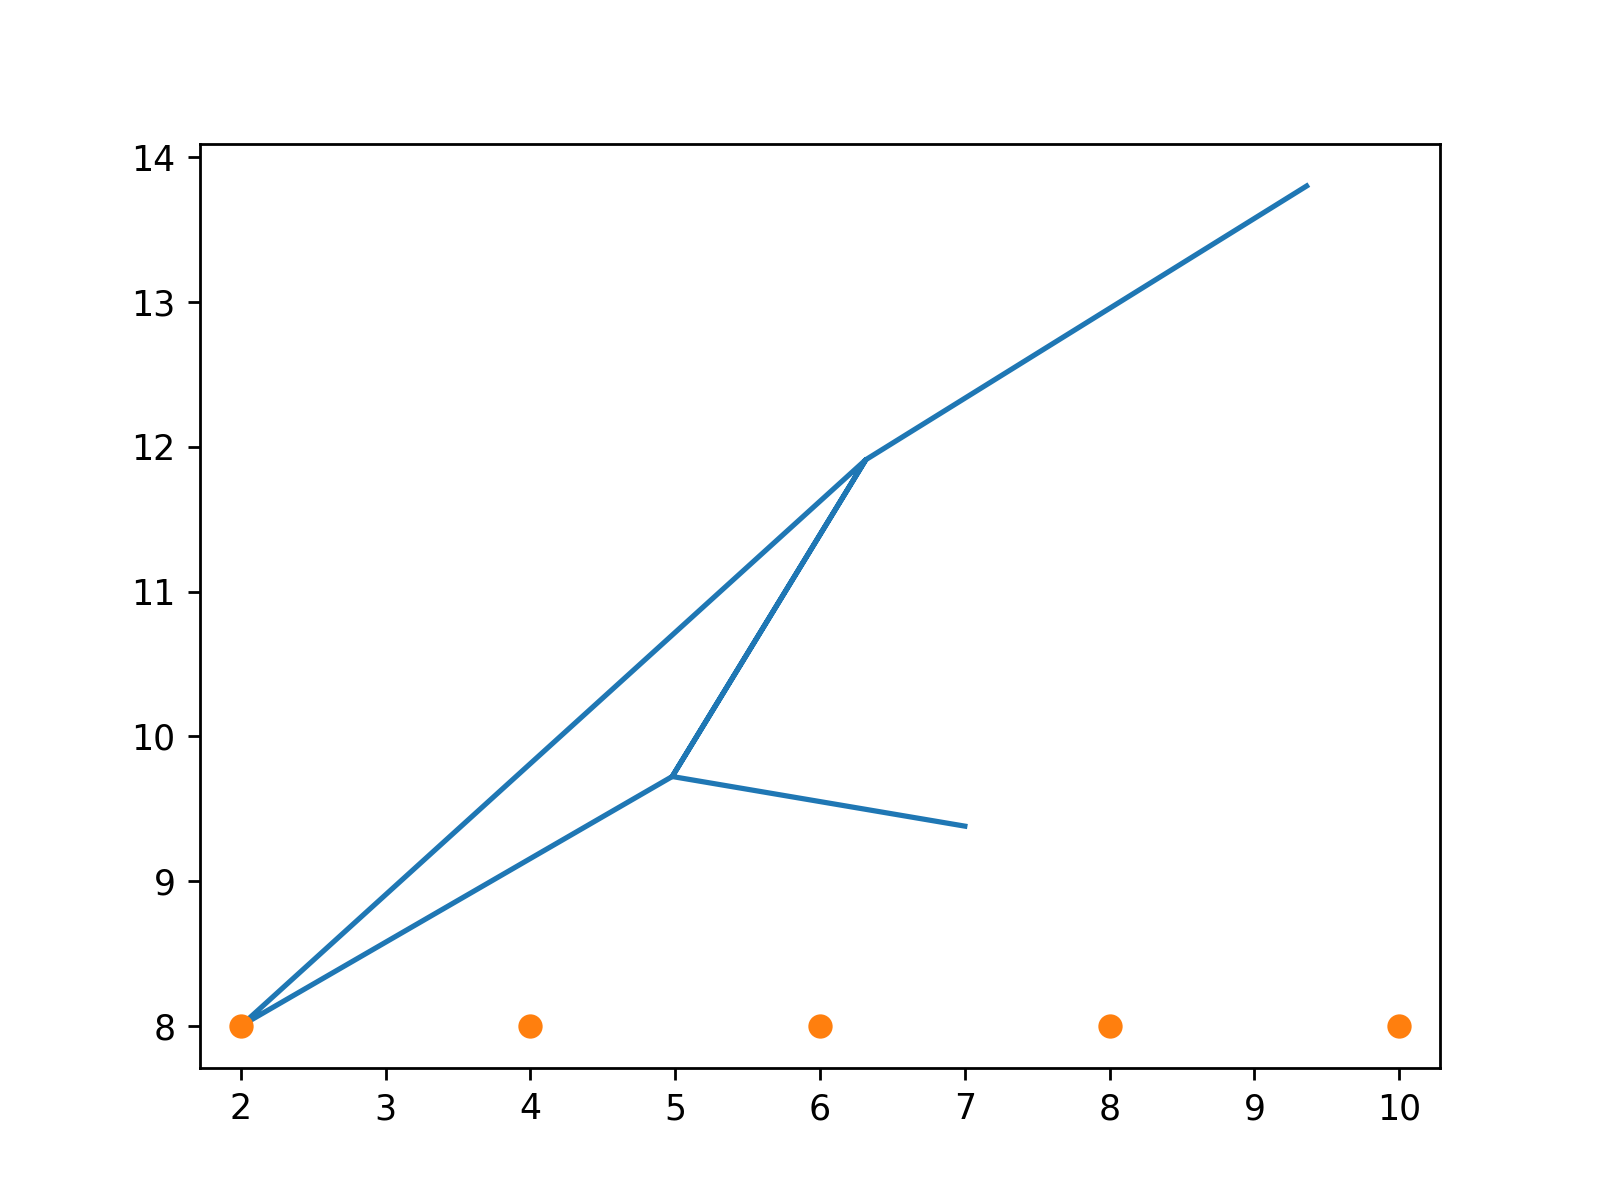

In [1]:
%matplotlib notebook
# this command tells notebook to display plots in the notebook
from math import *
from sympy import *
from numba import jit

from scipy.optimize import minimize 

import matplotlib
import matplotlib.pyplot as plt

# converts to degrees but may have degrees(x)%360 included
def Degs(x):
    return((degrees(x)))

# set up the symbols
d1,t1,d2,t2 = symbols("d1 t1 d2 t2", real=True)
d3,t3,d4,t4 = symbols("d3 t3 d4 t4", real=True)
p2,p3,p4,p5 = symbols("p2 p3 p4 p5", real=True)
s2,s3,s4,s5 = symbols("s2 s3 s4 s5",real=True)
Oad,Oat,Obd,Obt = symbols("Oad Oat Obd Obt")

# set up given information
# 5 precision coupler points
# E/SV2 Prob. 3.8
c1 = 2 + 8*I
c2 = 4 + 8*I
c3 = 6 + 8*I
c4 = 8 + 8*I
c5 = 10 + 8*I


#  given gammas angles
g2 = radians(30)
g3 = radians(50)
g4 = radians(70)
g5 = radians(90)

# *** Ground Pivot 
# *** Set GPOA & GPOB flags=True, if you are setting Oa & Ob Or set either one.
# if True, then you can set the ground pivot
GPOA = True
GPOB = True

if GPOA : 
    Oa = 9.36 + 13.8*I
else :
    Oa = Oad*exp(I*Oat)

if GPOB :
    Ob = 7.0 + 9.38*I
else :
    Ob = Obd*exp(I*Obt)
           
# vectors for two dyads
r1 = d1*exp(I*t1)
r2 = d2*exp(I*t2)
r3 = d3*exp(I*t3)
r4 = d4*exp(I*t4)

# deltas 
del2 = c2-c1
del3 = c3-c1
del4 = c4-c1
del5 = c5-c1

# LEFT SIDE #
#write out the absolute equations for left side of linkage 
posl1 = Oa+r1+r2 - c1
posl2 = Oa+r1*exp(I*p2) + r2*exp(I*g2) - c2
posl3 = Oa+r1*exp(I*p3) + r2*exp(I*g3) - c3
posl4 = Oa+r1*exp(I*p4) + r2*exp(I*g4) - c4
posl5 = Oa+r1*exp(I*p5) + r2*exp(I*g5) - c5




# *** the dyad-standard approach plus one absolute equation with A*exp(I*theta_A) to (0,0) ***
posl1 = Oa+r1+r2 - c1
posl2 = r1*(exp(I*p2) -1) + r2*(exp(I*g2) -1) - del2
posl3 = r1*(exp(I*p3) -1) + r2*(exp(I*g3) -1) - del3
posl4 = r1*(exp(I*p4) -1) + r2*(exp(I*g4) -1) - del4
posl5 = r1*(exp(I*p5) -1) + r2*(exp(I*g5) -1) - del5

# objective function using dyad-standard plus one absolute equation
# the objective function is the sum of the residuals squared (basically the distance squared to each pos. pt.)

def psl (x):
    if GPOA :
        tst1 = Oa  +((x[0]*exp(I*x[1])) +            (x[2]*exp(I*x[3]))  - c1)
    else :
        tst1 = (x[8]*exp(I*x[9])) +((x[0]*exp(I*x[1])) +            (x[2]*exp(I*x[3]))  - c1)
    tst2 = ((x[0]*exp(I*x[1]))*(exp(I*x[4])-1) + (x[2]*exp(I*x[3]))*(exp(I*g2)-1) - del2)
    tst3 = ((x[0]*exp(I*x[1]))*(exp(I*x[5])-1) + (x[2]*exp(I*x[3]))*(exp(I*g3)-1) - del3)
    tst4 = ((x[0]*exp(I*x[1]))*(exp(I*x[6])-1) + (x[2]*exp(I*x[3]))*(exp(I*g4)-1) - del4)
    tst5 = ((x[0]*exp(I*x[1]))*(exp(I*x[7])-1) + (x[2]*exp(I*x[3]))*(exp(I*g5)-1) - del5)
    
            
    return (re(tst1)**2 + im(tst1)**2+ re(tst2)**2 + im(tst2)**2 + re(tst3)**2 + im(tst3)**2 + 
           re(tst4)**2 + im(tst4)**2 + re(tst5)**2 + im(tst5)**2 )

# vector of initial guesses for the right-side objective function
if GPOA :
    x = [1,radians(210),2,radians(250),  radians(290),radians(310),radians(330),radians(350)]
else :
    x = [3.5,radians(10),5.5,radians(35),  radians(330),radians(320),radians(300),radians(280) ,10,radians(80)]

tst = psl(x) 
print( "psl =", re(tst),im(tst))

# BFGS seems to be the fastest for this objective function
# minimize returns a table of results, if you want to know, then print(res)
res = minimize(psl, x,tol=1.0e-3,method='BFGS')
#res = minimize(psl, x,tol=1.0e-9,method='SLSQP')
#res = minimize(psl, x,tol=1.0e-3,method='CG')
#res = minimize(psl, x,tol=1.0e-4)
            
print(" *** left-side solution ***")
print()

print("res.fun=",res.fun)


if GPOA :
    print("res.x=",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),Degs(res.x[4]),Degs(res.x[5]),
        Degs(res.x[6]),Degs(res.x[7]))
else : 
    print("res.x=",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),Degs(res.x[4]),Degs(res.x[5]),
        Degs(res.x[6]),Degs(res.x[7]), res.x[8],Degs(res.x[9]))


if GPOA :
    str = {d1:res.x[0],t1:res.x[1],d2:res.x[2],t2:res.x[3], p2:res.x[4],p3:res.x[5],p4:res.x[6],p5:res.x[7]}
else :
    str = {d1:res.x[0],t1:res.x[1],d2:res.x[2],t2:res.x[3], p2:res.x[4],p3:res.x[5],p4:res.x[6],p5:res.x[7],
           Oad:res.x[8],Oat:res.x[9]} 
    
print ("abs(posl1)=",N(abs(posl1.evalf(subs=str) ),3))
print ("abs(posl2)=",N(abs(posl2.evalf(subs=str) ),3))
print ("abs(posl3)=",N(abs(posl3.evalf(subs=str) ),3))
print ("abs(posl4)=",N(abs(posl4.evalf(subs=str) ),3))
print ("abs(posl5)=",N(abs(posl5.evalf(subs=str) ),3))
print("Phis>",Degs(res.x[4]),Degs(res.x[5]),Degs(res.x[6]),Degs(res.x[7]))

if GPOA :
    evalOa = Oa
else :
    evalOa = N(Oa.evalf(subs={Oad:res.x[8],Oat:res.x[9]}),3)
evalr1 = N(r1.evalf(subs={d1:res.x[0],t1:res.x[1]}),3)
evalr2 = N(r2.evalf(subs={d2:res.x[2],t2:res.x[3]}),3)


#return
#  *** right side ***

# *** the dyad-standard approach plus one absolute equation with B*exp(I*theta_B) to (0,0) ***
posr1 = Ob+r3+r4 - c1
posr2 = r3*(exp(I*s2)-1) + r4*(exp(I*g2)-1) - del2
posr3 = r3*(exp(I*s3)-1) + r4*(exp(I*g3)-1) - del3
posr4 = r3*(exp(I*s4)-1) + r4*(exp(I*g4)-1) - del4
posr5 = r3*(exp(I*s5)-1) + r4*(exp(I*g5)-1) - del5

#return

# object funtions for right side
# x[0] = d3, x[1] = t3, x[2]=d4, x[3]=t4, x[4]-x[7]=s2-s5, x[8]=Obd, x[9]=Obt
# the objective function is the sum of the residuals squared (basically the distance squared to each pos. pt.)
def psr (x):
    if GPOB :
        tst1 = (Ob) +((x[0]*exp(I*x[1])) +            (x[2]*exp(I*x[3]))  - c1)
    else :
        tst1 = (x[8]*exp(I*x[9])) +((x[0]*exp(I*x[1])) +            (x[2]*exp(I*x[3]))  - c1)
    tst2 = ((x[0]*exp(I*x[1]))*(exp(I*x[4])-1) + (x[2]*exp(I*x[3]))*(exp(I*g2)-1) - del2)
    tst3 = ((x[0]*exp(I*x[1]))*(exp(I*x[5])-1) + (x[2]*exp(I*x[3]))*(exp(I*g3)-1) - del3)
    tst4 = ((x[0]*exp(I*x[1]))*(exp(I*x[6])-1) + (x[2]*exp(I*x[3]))*(exp(I*g4)-1) - del4)
    tst5 = ((x[0]*exp(I*x[1]))*(exp(I*x[7])-1) + (x[2]*exp(I*x[3]))*(exp(I*g5)-1) - del5)
            
    return (re(tst1)**2 + im(tst1)**2 +re(tst2)**2 + im(tst2)**2 + re(tst3)**2 + im(tst3)**2 + 
           re(tst4)**2 + im(tst4)**2 + re(tst5)**2 + im(tst5)**2 )

# x[0] = d3, x[1] = t3, x[2]=d4, x[3]=t4, x[4]-x[7]=s2-s5, x[8]=Obd, x[9]=Obt
# vector of initial guesses to objective function
if GPOB :
    x = [2,radians(60),1,radians(120),
     radians(310),radians(290),radians(270),radians(240)]
else:     
    x = [2,radians(60),1,radians(120),
     radians(310),radians(290),radians(270),radians(240),3,radians(90)]

tst = psr(x) 
print()
print( "psr =", re(tst),im(tst))
print()
print("*** right side solution ***")

# BFGS seems to be the fastest for this objective function
# minimize returns a table of results, if you want to know, then print(res)
res = minimize(psr, x,tol=1.0e-2,method='BFGS')
#res = minimize(psr, x,tol=1.0e-9,method='SLSQP')
#res = minimize(psr, x,tol=1.0e-3,method='CG')
#res = minimize(psr, x)

print()

print("res.fun=",res.fun)

if GPOB :
    print("res.x=",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),Degs(res.x[4]),Degs(res.x[5]),
      Degs(res.x[6]),Degs(res.x[7]))
else :
    print("res.x=",res.x[0],Degs(res.x[1]),res.x[2],Degs(res.x[3]),Degs(res.x[4]),Degs(res.x[5]),
      Degs(res.x[6]),Degs(res.x[7]),res.x[8],Degs(res.x[9]))

if GPOB :   
    str = {d3:res.x[0],t3:res.x[1],d4:res.x[2],t4:res.x[3], s2:res.x[4],s3:res.x[5],s4:res.x[6],s5:res.x[7]}
else :
    str = {d3:res.x[0],t3:res.x[1],d4:res.x[2],t4:res.x[3], s2:res.x[4],s3:res.x[5],s4:res.x[6],s5:res.x[7],Obd:res.x[8],Obt:res.x[9]}

print ("abs(posr1)=",N(abs(posr1.evalf(subs=str) ),3))
print ("abs(posr2)=",N(abs(posr2.evalf(subs=str) ),3))
print ("abs(posr3)=",N(abs(posr3.evalf(subs=str) ),3))
print ("abs(posr4)=",N(abs(posr4.evalf(subs=str) ),3))
print ("abs(posr5)=",N(abs(posr5.evalf(subs=str) ),3))

print("Psis>",Degs(res.x[4]),Degs(res.x[5]),Degs(res.x[6]),Degs(res.x[7]))

evalr3 = N(r3.evalf(subs={d3:res.x[0],t3:res.x[1]}),3)
evalr4 = N(r4.evalf(subs={d4:res.x[2],t4:res.x[3]}),3)
evalr5 = evalr2-evalr4
evalr6 = evalr1+evalr2-evalr4-evalr3
if GPOB : 
    evalOb = Ob
else :
    evalOb = N(Ob.evalf(subs={Obd:res.x[8],Obt:res.x[9]}),3)


print("Oa = (",evalOa,")  (", abs(evalOa),"@",degrees(arg(evalOa)),"degs)")
print("Ob = (",evalOb,")  (", abs(evalOb),"@",degrees(arg(evalOb)),"degs)")
print("R1 = (",evalr1,")  (", abs(evalr1),"@",degrees(arg(evalr1)),"degs)")
print("R2 = (",evalr2,")  (", abs(evalr2),"@",degrees(arg(evalr2)),"degs)")
print("R3 = (",evalr3,")  (", abs(evalr3),"@",degrees(arg(evalr3)),"degs)")
print("R4 = (",evalr4,")  (", abs(evalr4),"@",degrees(arg(evalr4)),"degs)")
print("R5 = (",evalr5,")  (", abs(evalr5),"@",degrees(arg(evalr5)),"degs)")
print("R6 = (",evalr6,")  (", abs(evalr6),"@",degrees(arg(evalr6)),"degs)")
print()

# attempt to rate the linkage
print("* Linkage Rating *")
s = min(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
l = max(abs(evalr1),abs(evalr3),abs(evalr5),abs(evalr6))
pnq = abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)
print('P+Q > S+L =',pnq ,'>',(s+l) )
if (abs(evalr1)+abs(evalr3)+abs(evalr5)+abs(evalr6)-(s+l)) > (s+l):
    print("grashof = true")
else:
    print("grashof = false")
    
print("Link length ratio l/s = ",l/s)
print()

print("Oa = (",evalOa,")")
print("A = (",evalOa+evalr1,")")
print("C = (",evalOa+evalr1+evalr2,")")
print("B = (",evalOa+evalr1+evalr2-evalr4,")")
print("Ob = (",evalOb,")")

# call matplotlib routines for a scatter plot
fig, ax = plt.subplots()
ax.plot([re(evalOa),re(evalOa+evalr1),re(c1),re(evalOa+evalr1+evalr2-evalr4),re(evalOa+evalr1),re(evalOa+evalr1+evalr2-evalr4),re(evalOb)],
        [im(evalOa),im(evalOa+evalr1),im(c1),im(evalOa+evalr1+evalr2-evalr4),im(evalOa+evalr1),im(evalOa+evalr1+evalr2-evalr4),im(evalOb)],
        [re(c1),re(c2),re(c3),re(c4),re(c5)],[im(c1),im(c2),im(c3),im(c4),im(c5)],'o')
ax.set_aspect('equal',adjustable='datalim')
plt.show()
